In [ ]:
from datetime import date
from datetime import datetime
import numpy as np
import requests

# image read libraries
from PIL import Image
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')
print('Drive mounted')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Authenticated
Drive mounted


In [ ]:
mypath = "../content/drive/MyDrive/projecten/wintersport_projectje/" 

In [15]:
url = "https://raw.githubusercontent.com/BVKC21/wintersport_projectje/master/achtergrond.png?token=ATSHIHQ6MXP67KRV5SVGKYTBCPO24" 
#load background 
import urllib.request
from PIL import Image 
import requests

im = Image.open(requests.get(url, stream=True).raw)


UnidentifiedImageError: ignored

In [ ]:
urllib.request.urlretrieve("https://github.com/BVKC21/wintersport_projectje/blob/master/achtergrond.png", "sample.png")

img = Image.open("sample.png")
img



HTTPError: ignored

In [ ]:
def create_text(vertrekdatum):
#vertrekdatum needs to be in YYYY-MM-DD format
    my_date = datetime.strptime(vertrekdatum, "%Y-%m-%d")
    today = datetime.now()
    delta= my_date-today
    a= "JAAAAAAAA, Let's GO"
    b= 'Bijna, nog '+ str(delta.days)+ ' dagen :)'
    c= 'Nee, nog '+ str(delta.days)+ ' dagen :('
    if delta.days < 10:
      return (b)
    elif delta.days <1:
        return (a)
    else:
        return (c)


def make_image(data,size=(20, 15), dpi=80):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('hot')
    plt.text(80,100,'Gaan we nou al op wintersport?',fontsize=80)
    plt.text(220,300, create_text('2022-03-22'),fontsize=75)
    ax.imshow(data, aspect='equal',interpolation="nearest")

In [ ]:
make_image(img)

SyntaxError: ignored


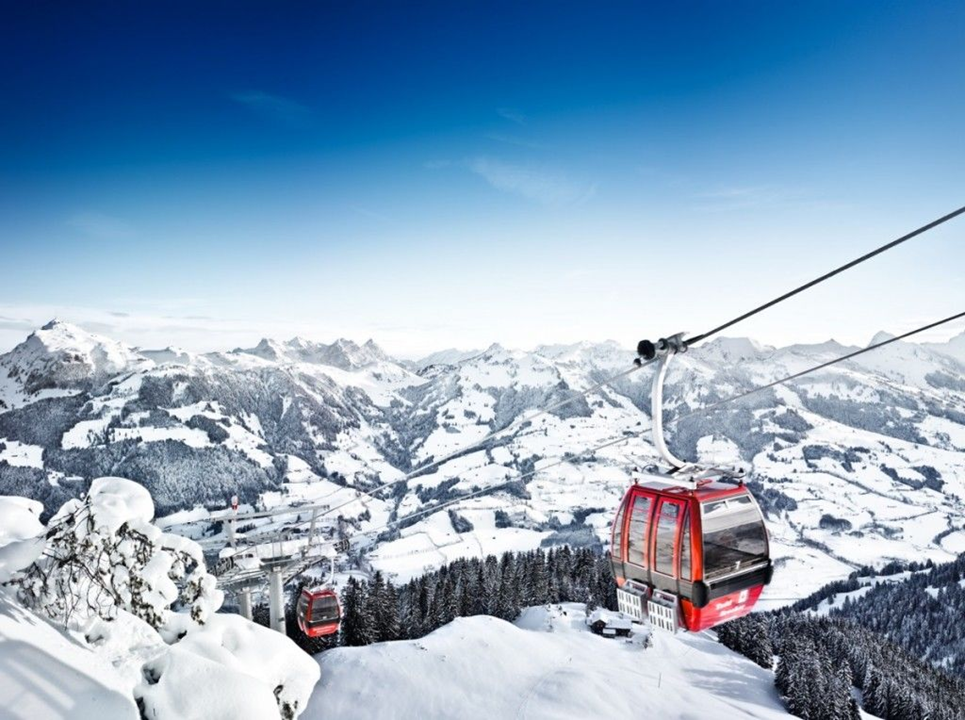

In [ ]:
import plotly.graph_objects as go
text = create_text('2022-03-22')
# Create figure
fig = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
fig.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
fig.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

fig.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
fig.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=img)
)
fig.add_annotation(x=img_width * scale_factor/2, y=img_height * scale_factor/1.2,
            text="Gaan we nou al op wintersport?",
            showarrow=False,
            yshift=10,
            font_size=40,
            font_color='black')

fig.add_annotation(x=img_width * scale_factor/2, y=img_height * scale_factor/1.5,
            text=text,
            showarrow=False,
            yshift=10,
            font_size=30,
            font_color='black')
# Configure other layout
fig.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Disable the autosize on double click because it adds unwanted margins around the image
# More detail: https://plotly.com/python/configuration-options/
fig.show(config={'doubleClick': 'reset'})